In [1]:
pip install split_folders

In [3]:
import splitfolders

folder = '/content/drive/MyDrive/data'
splitfolders.ratio(folder, output= 'splitdata', seed = 45, ratio = (0.8,0.1,0.1))

Copying files: 305 files [00:05, 52.56 files/s] 


In [14]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten,BatchNormalization,Dropout

In [6]:
train_dr = keras.utils.image_dataset_from_directory(
    directory = '/content/splitdata/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256)
)

test_dr = keras.utils.image_dataset_from_directory(
    directory = '/content/splitdata/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256)
)
val_dr = keras.utils.image_dataset_from_directory(
    directory = '/content/splitdata/val',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256)
)

Found 243 files belonging to 2 classes.
Found 32 files belonging to 2 classes.
Found 30 files belonging to 2 classes.


In [7]:
def process(image,label):
  image = tf.cast(image/255.,tf.float32)
  return image,label

train_dr = train_dr.map(process)
test_dr = test_dr.map(process)
val_dr = val_dr.map(process)

In [48]:
#model
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding ='valid',activation ='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding ='valid',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding ='valid',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


In [49]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 127, 127, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 62, 62, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 30, 30, 64)       

In [50]:
model.compile(optimizer = 'adam',loss ='binary_crossentropy',metrics =['accuracy'])

In [51]:
history = model.fit(train_dr,epochs = 10, validation_data=val_dr)

Epoch 1/10
8/8 [==============================] - 4s 117ms/step - loss: 0.9002 - accuracy: 0.5391 - val_loss: 0.6863 - val_accuracy: 0.4333
Epoch 2/10
8/8 [==============================] - 3s 111ms/step - loss: 0.6811 - accuracy: 0.5556 - val_loss: 0.6486 - val_accuracy: 0.5667
Epoch 3/10
8/8 [==============================] - 4s 94ms/step - loss: 0.6078 - accuracy: 0.7243 - val_loss: 0.7197 - val_accuracy: 0.5667
Epoch 4/10
8/8 [==============================] - 3s 95ms/step - loss: 0.5758 - accuracy: 0.7202 - val_loss: 0.5696 - val_accuracy: 0.6333
Epoch 5/10
8/8 [==============================] - 3s 93ms/step - loss: 0.4861 - accuracy: 0.7654 - val_loss: 0.4842 - val_accuracy: 0.7333
Epoch 6/10
8/8 [==============================] - 4s 109ms/step - loss: 0.4295 - accuracy: 0.8066 - val_loss: 0.3882 - val_accuracy: 0.8333
Epoch 7/10
8/8 [==============================] - 3s 106ms/step - loss: 0.3494 - accuracy: 0.8519 - val_loss: 0.3737 - val_accuracy: 0.8000
Epoch 8/10
8/8 [=======

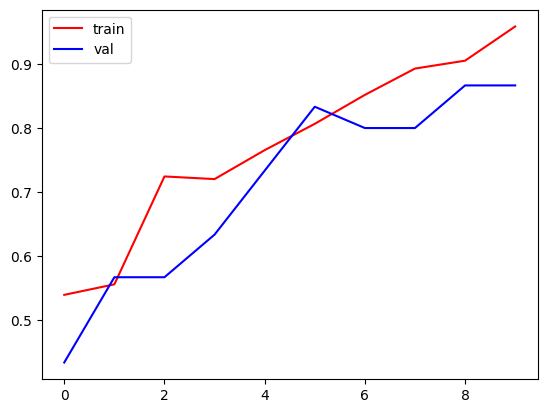

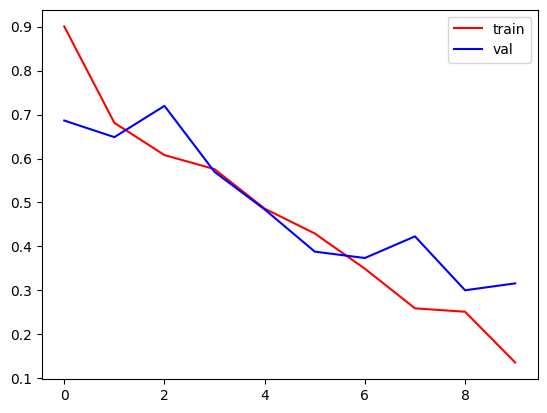

In [52]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color = 'red', label = 'train')
plt.plot(history.history['val_accuracy'],color = 'blue', label = 'val')
plt.legend()
plt.show()

plt.plot(history.history['loss'],color = 'red', label = 'train')
plt.plot(history.history['val_loss'],color = 'blue', label = 'val')
plt.legend()
plt.show()

In [53]:
test_loss, test_accuracy = model.evaluate(test_dr, verbose=2)

print(f"Test accuracy: {test_accuracy}")
print(f"Test loss: {test_loss}")

1/1 - 0s - loss: 0.7328 - accuracy: 0.7812 - 472ms/epoch - 472ms/step
Test accuracy: 0.78125
Test loss: 0.7328048348426819


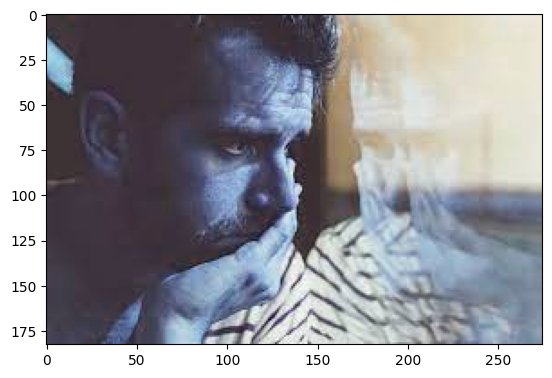

In [54]:
import cv2
test_img = cv2.imread('/content/download.jpg')
plt.imshow(test_img)


In [55]:
test_img = cv2.resize(test_img,(256,256))

In [56]:
test_input = test_img.reshape(1,256,256,3)

In [57]:
model.predict(test_input)

1/1 [==============================] - 0s 84ms/step


array([[1.]], dtype=float32)

1/1 [==============================] - 0s 30ms/step


array([[1.]], dtype=float32)

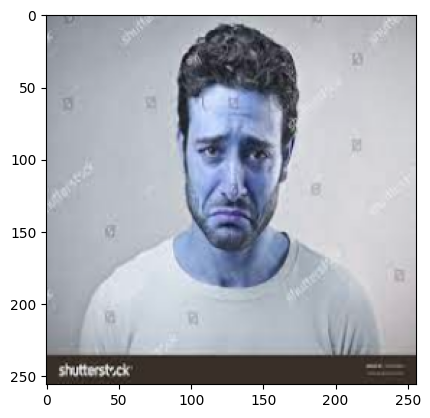

In [95]:
import cv2
test_img = cv2.imread('/content/download (5).jpg')
plt.imshow(test_img)
test_img = cv2.resize(test_img,(256,256))
plt.imshow(test_img)
test_input = test_img.reshape(1,256,256,3)
model.predict(test_input)